<a href="https://colab.research.google.com/github/VarelAntoni/DBS-Coding-Camp-2025/blob/main/Machine_Learning_Terapan/Proyek_Pertama/Proyek_Pertama_Machine_Learning_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import library yang digunakan

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahideseker/wine-quality-classification")

print("Path to dataset files:", path)

100%|██████████| 7.43k/7.43k [00:00<00:00, 7.25MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sahideseker/wine-quality-classification/versions/1


download dataset yang digunakan, disini saya menggunakan dataset Wine Quality Classification yang bertujuan untuk mengelompokkan grade dari wine

In [3]:
print(os.listdir(path))

['wine_quality_classification.csv']


print list dari path yang telah di download

In [4]:
df = pd.read_csv(os.path.join(path, 'wine_quality_classification.csv'))
df.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


menginisiasi dataset dan menampilkan dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fixed_acidity   1000 non-null   float64
 1   residual_sugar  1000 non-null   float64
 2   alcohol         1000 non-null   float64
 3   density         1000 non-null   float64
 4   quality_label   1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


melihat informasi dari dataset yang digunakan, terlihat terdapat 1000 row, 5 kolom. memiliki 4 kolom yang bertipe float dan 1 kolom yang bertipe object

In [6]:
df.describe(include="all")

,fixed_acidity,residual_sugar,alcohol,density,quality_label
count,1000.000000,1000.00000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,medium
freq,NaN,NaN,NaN,NaN,355
mean,10.174300,7.69200,11.039900,0.997505,NaN
std,3.452693,4.20892,1.760283,0.004300,NaN
min,4.000000,0.50000,8.000000,0.990000,NaN
25%,7.100000,4.10000,9.500000,0.993900,NaN
50%,10.400000,7.55000,11.000000,0.997400,NaN
75%,13.125000,11.50000,12.600000,1.001200,NaN


terlihat bahwa nilai maximum terbilang normal

In [7]:
df.isnull().sum()

,0
fixed_acidity,0
residual_sugar,0
alcohol,0
density,0
quality_label,0


melihat data yang null namun tidak terdapat data yang null

In [8]:
df.duplicated().sum()

np.int64(0)

melihat data yang memiliki duplikasi, dan tidak ada data yang duplikat.

In [9]:
df['quality_label'].value_counts()

,count
quality_label,
medium,355
high,343
low,302


melihat jumlah value yang dimiliki target, dan terdapat 3 value yaitu medium, high, dan low

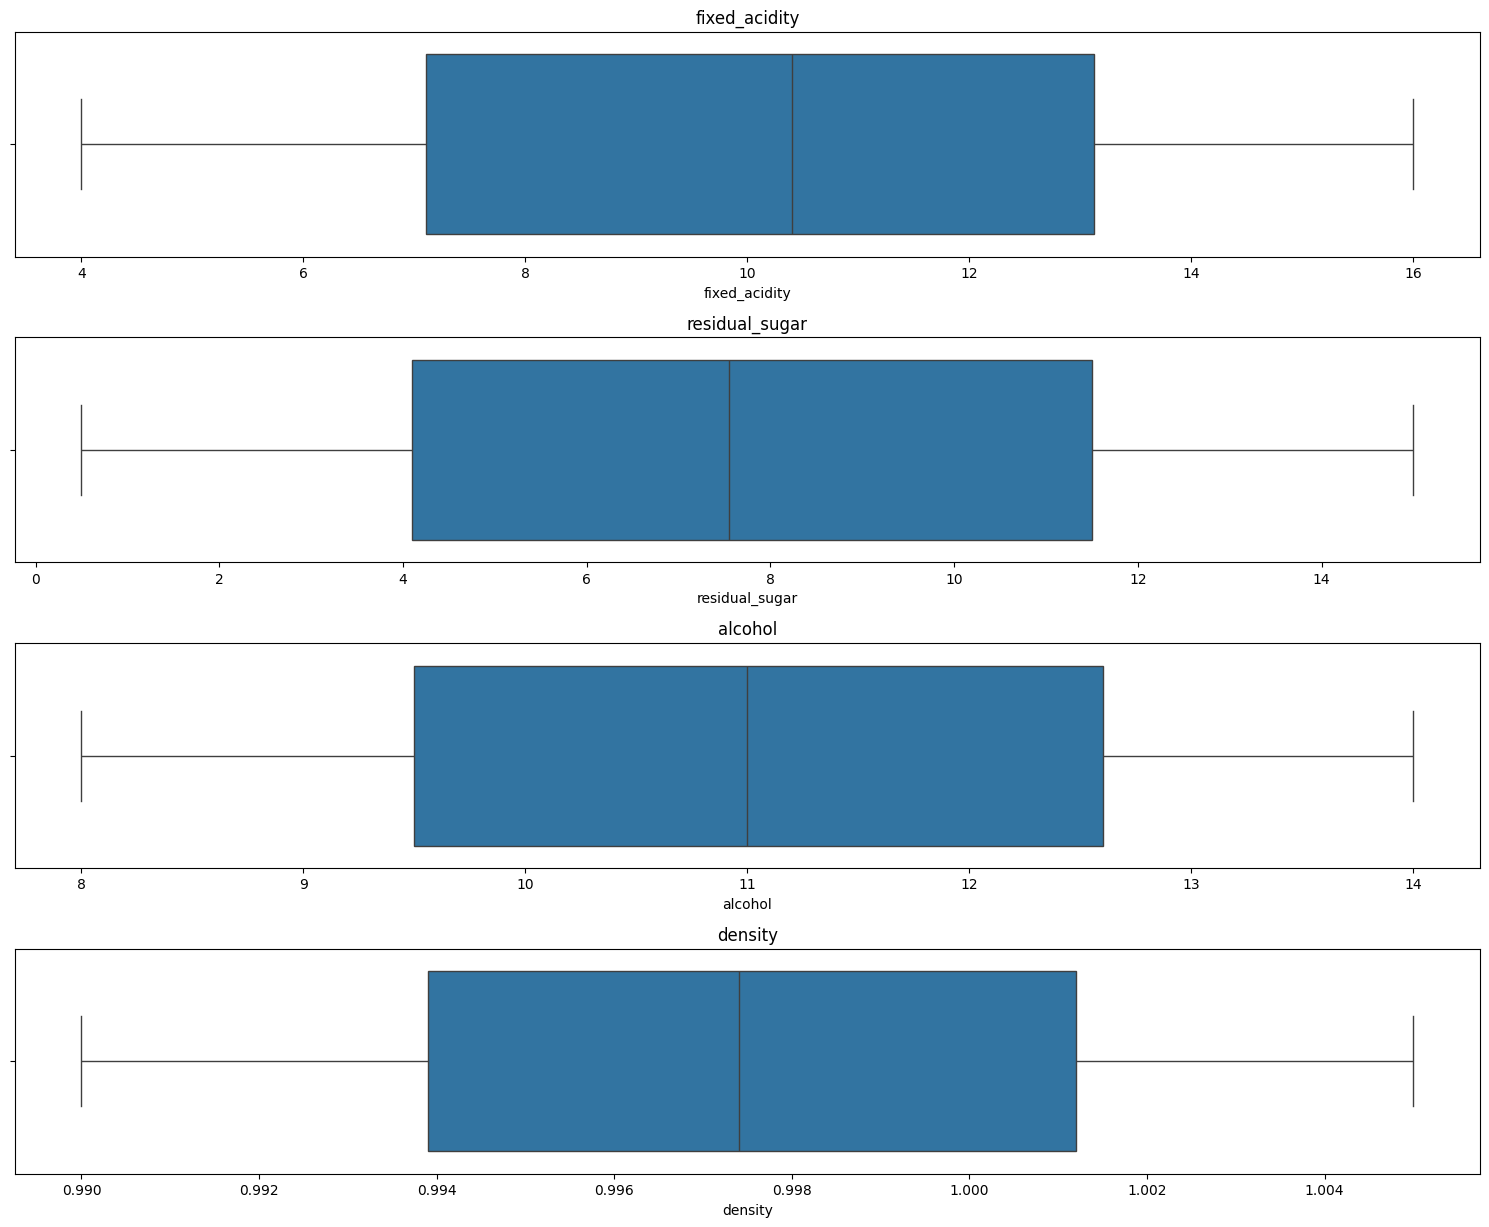

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns

num_plots = len(numerical_cols)
num_rows = 5
num_cols = (num_plots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

if num_cols == 1:
    axes = axes.reshape(num_rows, num_cols)

for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_idx = i % num_cols
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()

melihat outlier yang terdapat di dataset, namun boxplot terlihat normal

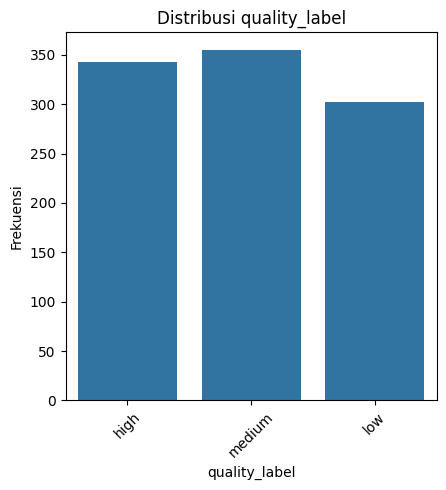

In [11]:
categorical_columns = df.select_dtypes(include='object').columns

num_plots = len(categorical_columns)
num_cols = 5
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

melihat distribusi persebaran dari target

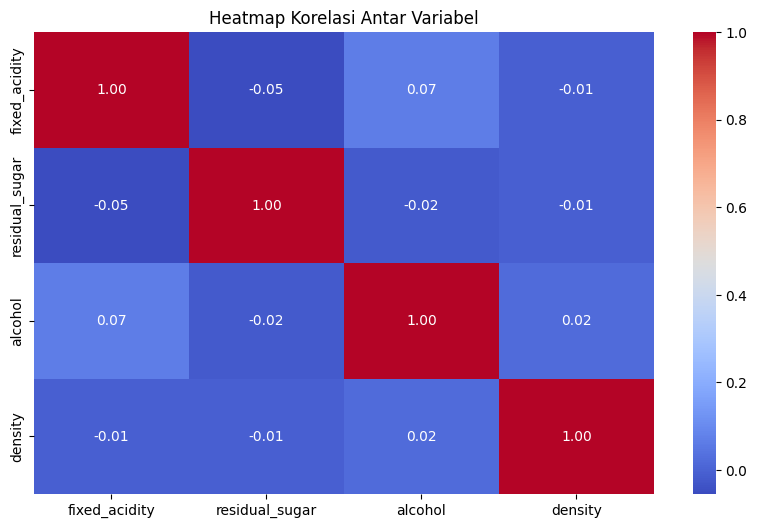

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

melihat korelasi antara numerical features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

   fixed_acidity  residual_sugar   alcohol   density quality_label
0      -0.253349       -0.307121  1.455096  0.696864          high
1       0.297221       -1.353042  1.682446 -1.466949        medium
2       0.413131       -1.614523 -1.614127 -0.931813           low
3       0.789837       -0.259579  0.943559  0.627064           low
4       1.079611        1.451930 -0.363703 -0.768945        medium


melakukan scaling kepada numerical features

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['quality_label'] = label_encoder.fit_transform(df['quality_label'])
print(df[['quality_label', 'quality_label']].head())

   quality_label  quality_label
0              0              0
1              2              2
2              1              1
3              1              1
4              2              2


melakukan encoding terhadap target agar bertipe integer

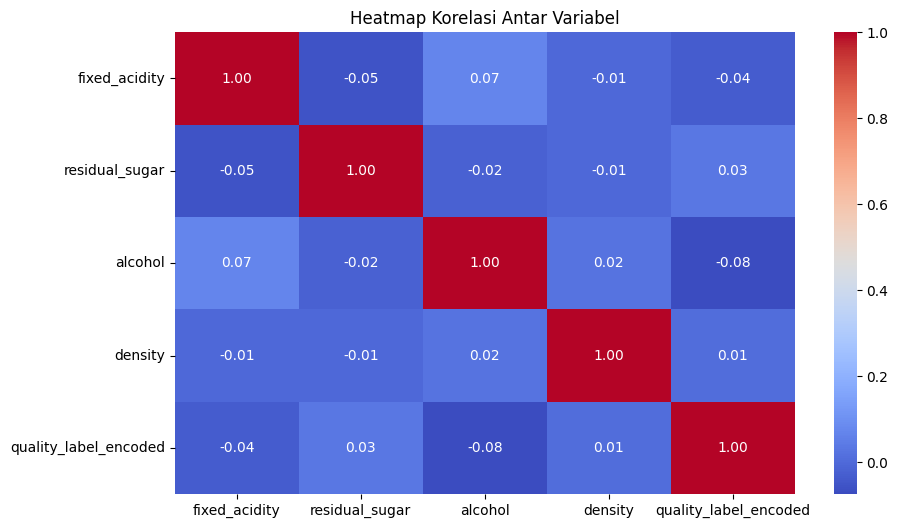

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

heatmap dari dataset yang sudah diperbarui

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality_label'])
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(800, 5), y_train=(800,)
Test set shape: X_test=(200, 5), y_test=(200,)


ngesplit dataset menjadi X dan y, dan melakukan train_test_split

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=200) # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Results:
Confusion Matrix:
[[71  0  0]
 [ 0 62  0]
 [ 0  0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy Score:
1.0


melakukan prediksi menggunakan logistic regression dan melakukan evaluasi terhadap model

In [22]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
# Using a linear kernel, but other kernels like 'rbf' can be tried
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machine Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))



Support Vector Machine Results:
Confusion Matrix:
[[71  0  0]
 [ 0 62  0]
 [ 0  0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy Score:
1.0


melakukan prediksi menggunakan SVM dan melakukan evaluasi terhadap model

In [24]:
import xgboost as xgb

# Initialize and train the XGBoost model
# Using the objective as 'multi:softmax' for multiclass classification
# and num_class for the number of classes.
# The number of classes is the number of unique values in the target variable.
num_classes = y_train.nunique()

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:34:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Confusion Matrix:
[[71  0  0]
 [ 0 62  0]
 [ 0  0 67]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        67

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Accuracy Score:
1.0


melakukan prediksi menggunakan xgboost dan melakukan evaluasi terhadap model

In [25]:
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")


Model Comparison:
Logistic Regression Accuracy: 1.0
SVM Accuracy: 1.0
XGBoost Accuracy: 1.0


membandingkan ketiga model dan dapat dilihat bahwa model memiliki akurasi yang sangat tinggi yaitu 1.0 karena dataset yang digunakan sangat bersih


Training vs Test Accuracy Comparison:
Logistic Regression: Train=1.0000, Test=1.0000
SVM:                 Train=1.0000, Test=1.0000
XGBoost:             Train=1.0000, Test=1.0000


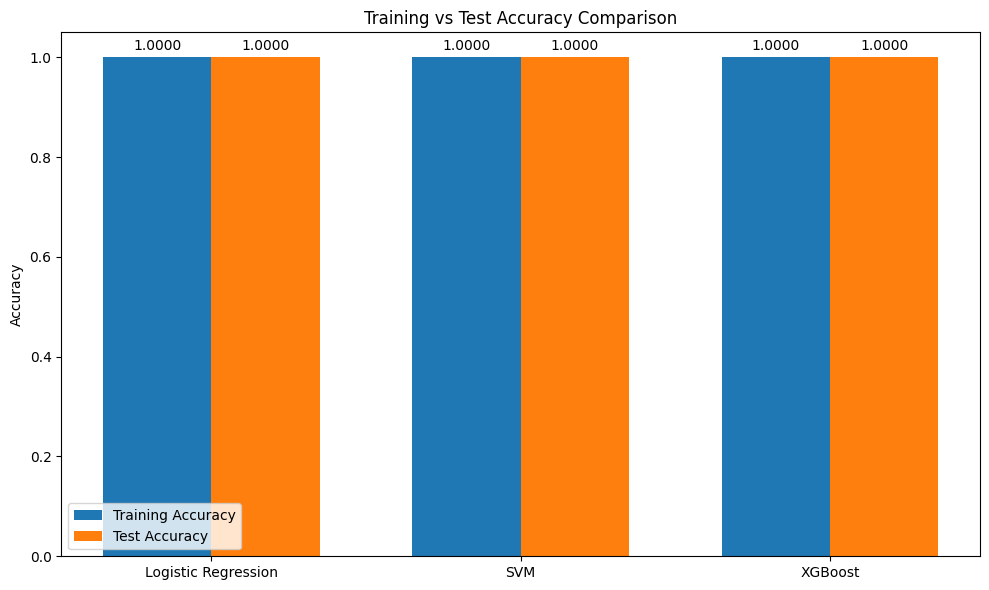

In [27]:
# Calculate training accuracy for each model
y_train_pred_log_reg = log_reg.predict(X_train)
train_accuracy_log_reg = accuracy_score(y_train, y_train_pred_log_reg)

y_train_pred_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

y_train_pred_xgb = xgb_model.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)

# Get test accuracies from previous evaluation
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the comparison
print("\nTraining vs Test Accuracy Comparison:")
print(f"Logistic Regression: Train={train_accuracy_log_reg:.4f}, Test={test_accuracy_log_reg:.4f}")
print(f"SVM:                 Train={train_accuracy_svm:.4f}, Test={test_accuracy_svm:.4f}")
print(f"XGBoost:             Train={train_accuracy_xgb:.4f}, Test={test_accuracy_xgb:.4f}")

# Visualize the comparison
labels = ['Logistic Regression', 'SVM', 'XGBoost']
train_accuracies = [train_accuracy_log_reg, train_accuracy_svm, train_accuracy_xgb]
test_accuracies = [test_accuracy_log_reg, test_accuracy_svm, test_accuracy_xgb]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Test Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.4f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

memvisualisasi akurasi model dan membandingkan antara training accuracy dan test accuracy guna mengetahui jika model terindikasi overfitting. namun dari visualisasi dapat terlihat kalau kedua accuracy seimbang dengan accuracy yang tinggi